In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/Documents/optimal_control_julia/lec_5/Project.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using Plots

In [3]:
Q = Diagonal([0.5; 1])

function plot_f(x, y)
    return 0.5 * ([x; y] - [1; 0])' * Q * ([x; y] - [1; 0])
end

function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end

function ∇f(x)
    return Q*(x-[1; 0])
end

function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [4]:
function c(x)
    return x[1]^2 + 2*x[1] - x[2]
end

function ∂c(x)
    return [2*x[1]+2 -1]
end

∂c (generic function with 1 method)

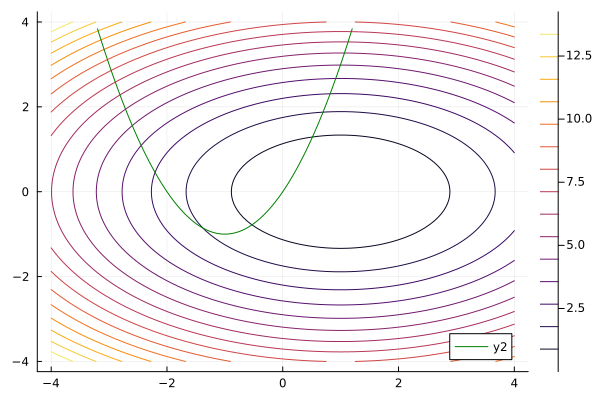

In [5]:
function plot_landscape()

    x = range(-4, 4, length=100)
    y = range(-4, 4, length=100)
    
    z = @. plot_f(x', y)
    Plots.contour(x, y, z)
    
    xc = LinRange(-3.2,1.2, 100)
    Plots.plot!(xc, xc.^2+2.0.*xc, color=:"green")
end

plot_landscape()

In [18]:
function newton_step(x0,λ)
    C = ∂c(x0)
    ∇L = ∇f(x0) + C' * λ
    ∇²L = ForwardDiff.jacobian( x -> ∇f(x) + ∂c(x)' * λ, x0 )

    Δz = [ ∇²L C'; C 0 ] \ [ -∇L; -c(x0) ]
    Δx = Δz[1:2]
    Δλ = Δz[3]

    return x0 + Δx, λ + Δλ
end

newton_step (generic function with 1 method)

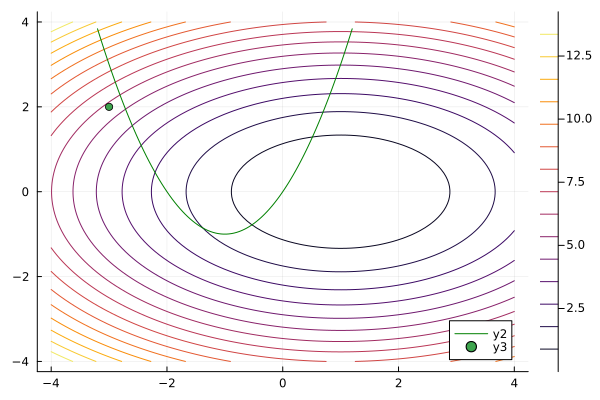

In [19]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
scatter!([xguess[1]], [xguess[2]])

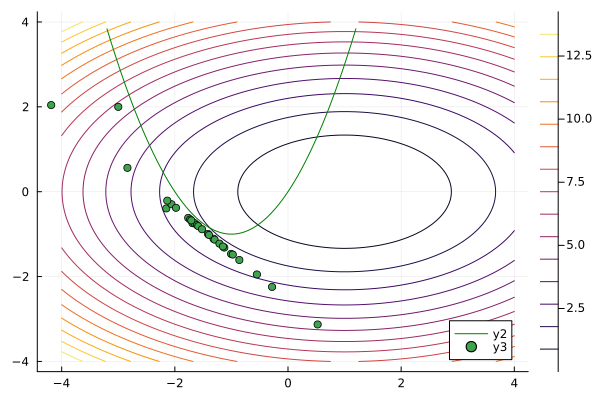

In [49]:
newx, newλ = newton_step(xguess[:,end], λguess[end])
xguess = [xguess newx]
λguess = [λguess newλ]
plot_landscape()
scatter!( xguess[1,:], xguess[2,:])

In [51]:
xend = xguess[:,end]
λend = λguess[end]
C = ∂c(xend)
∇²L = ForwardDiff.jacobian( x -> ∇f(x) + ∂c(x)' * λend, xend )

H = [ ∇²L C'; C 0 ]
eigvals(H)

3-element Vector{Float64}:
 -2.1311056037898637
 -0.5751160590127937
  1.6247998034973756

## Regularized Newton Step

In [52]:
function regularized_newton_step(x0,λ)

    Β = 1.0
    C = ∂c(x0)
    ∇L = ∇f(x0) + C' * λ
    ∇²L = ForwardDiff.jacobian( x -> ∇f(x) + ∂c(x)' * λ, x0 )

    H = [ ∇²L C'; C 0 ]
    e = eigvals(H)

    while !(sum(e .> 0) == length(x0) &&  sum(e .< 0) == length(λ))
        H = H + Β * Diagonal([Β*ones(length(x0)); -Β*ones(length(λ))])
        e = eigvals(H)
    end

    Δz = H \ [ -∇L; -c(x0) ]
    Δx = Δz[1:2]
    Δλ = Δz[end]
    
    return x0 + Δx, λ + Δλ
end

regularized_newton_step (generic function with 1 method)

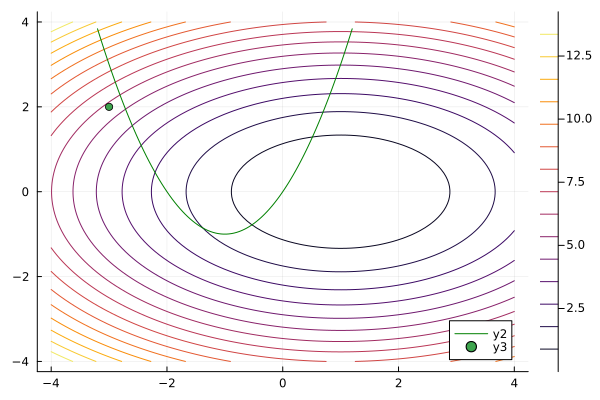

In [53]:
xguess = [-3; 2]
λguess = [0.0]
plot_landscape()
scatter!([xguess[1]], [xguess[2]])

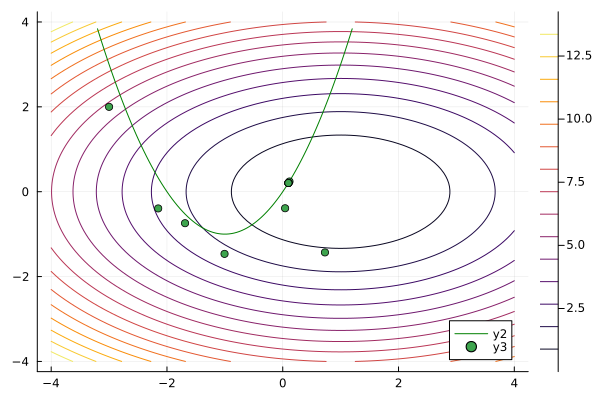

In [65]:
newx, newλ = regularized_newton_step(xguess[:,end], λguess[end])
xguess = [xguess newx]
λguess = [λguess newλ]
plot_landscape()
scatter!( xguess[1,:], xguess[2,:])

In [66]:
xend = xguess[:,end]
λend = λguess[end]
C = ∂c(xend)
∇²L = ForwardDiff.jacobian( x -> ∇f(x) + ∂c(x)' * λend, xend )

H = [ ∇²L C'; C 0 ]
eigvals(H)

3-element Vector{Float64}:
 -1.9939269163529991
  0.9844880613688235
  2.920258937186233